1. The data and reference notebook is attached here, try to document every plot and analysis that you do.
2. Experiment with different functionalities of jupyter notebook and get habituated with its features.
3. Try out as many plotting techniques as you can, but write down your observations for each of them.
4. Please be sure to have proper axes names, title and legend to all the charts that you plot.
5. Have a proper conclusions section where in you summarise your overall observation.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
ds=pd.read_csv("haberman.csv",names=['Age','yr_oper','pan','surStatus'])

In [20]:
ds

,Age,yr_oper,pan,surStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


There are 3 columns i.e 3 features 
1. 1st feature is Age of patient at time of operation (numerical) 
2. 2nd feature is Patient's year of operation (year - 1900, numerical)
3. 3rd feature is Number of positive axillary nodes detected (numerical)
4. 4th feature is Survival status (class attribute) 1 = the patient survived 5 years or longer 
    2 = the patient died within 5 years

In [21]:
ds.head()

,Age,yr_oper,pan,surStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [22]:
ds.describe()

,Age,yr_oper,pan,surStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### 2-D ScatterPlots

In [6]:
pd.unique(ds['survived'])

array([1, 2], dtype=int64)

In [8]:
ds['survived'].value_counts()

1    224
2     81
Name: survived, dtype: int64

<p>In the dataset there are 224 survived patients and 81 not survived patients</p>

### 2-D Scatter Plot

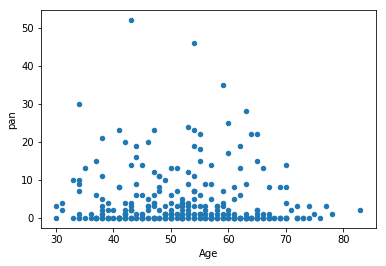

In [9]:
ds.plot(kind='scatter',x='Age',y='pan')

<p> Simple 2-D gives us nothing. we cannot conclude anything from the above plot </p>

***2-D Scatter Plot using Seaborn***

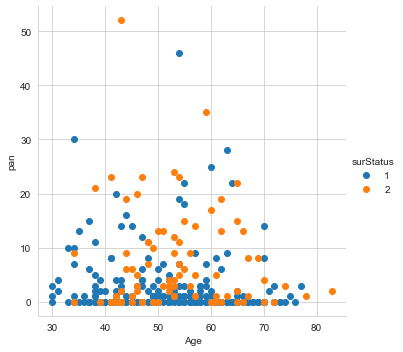

In [32]:
snb.set_style('whitegrid')
snb.FacetGrid(ds,hue='surStatus',height=5).map(plt.scatter,'Age','pan').add_legend();
plt.show()

Above plot shows two labels with different colors, class 1 is shown in blue color and class 2 is shown in orange color from this we can understand the possibility of classifying the two different classes using mentioned features.

### Pair Plots

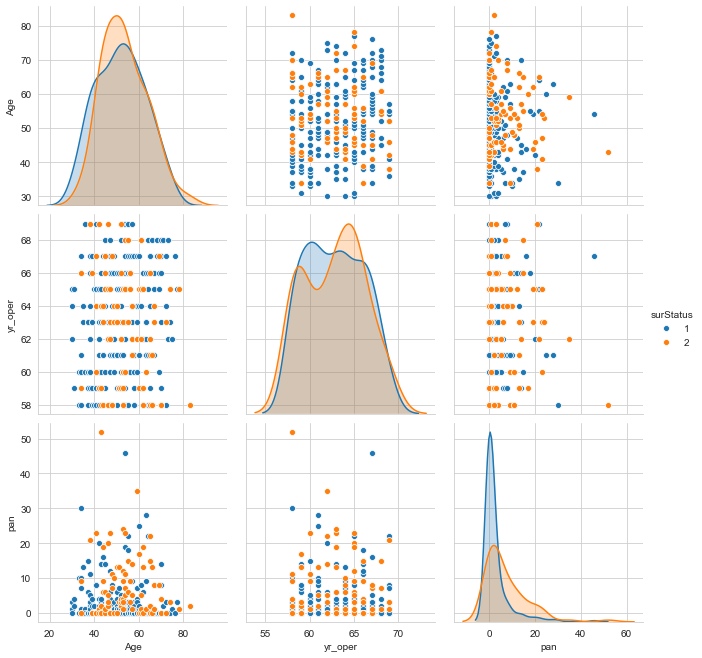

In [33]:
plt.close()
snb.set_style('whitegrid')
snb.pairplot(ds,hue='surStatus',height=3)
plt.show()

I think there should not be a third section which is a plot between dependent feature "1.1" and other feathers but the graph is showing third columns because feature '1.1' has numeral values 1 and 2. 

using pairplot method we can draw all the possible pairs of the features 
we can understand from above pairplots that no two features can classify the class '1' and class '2'

### 3-D ScatterPlots

In [35]:
import plotly.express as px
fig = px.scatter_3d(ds, x='Age', y='yr_oper', z='pan',symbol='surStatus',color='surStatus')
fig.show()

In [36]:
fig = px.scatter_3d(ds, x='Age', y='yr_oper', z='pan',color='surStatus')
fig.show()

***Simple 1-D Plot***

In [38]:
#These are the records of the patients who survived more than 5 years
sur=ds.loc[ds['surStatus']==1]

#These are the records of the patients who died in less than 5 years
n_sur=ds.loc[ds['surStatus']==2]

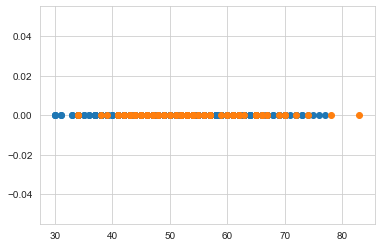

In [39]:
plt.plot(sur["Age"], np.zeros_like(sur['Age']), 'o') 
plt.plot(n_sur["Age"], np.zeros_like(n_sur['Age']), 'o')
plt.show()

<p>We cannot actually see much of the blue dots in the plot because they are overlapped with the orange points.<br> Many dots are overlapped we cannot clearly observe how many dots are exactly located at a point.<br>To see exactly how many points of a feature are located at a certain value we have to use other plots like PDF and CDF.</p>

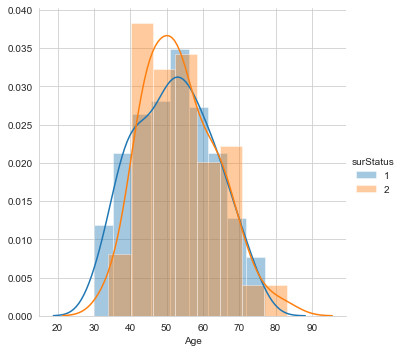

In [44]:
snb.FacetGrid(ds, hue="surStatus", height=5).map(sns.distplot, "Age").add_legend();
plt.show();

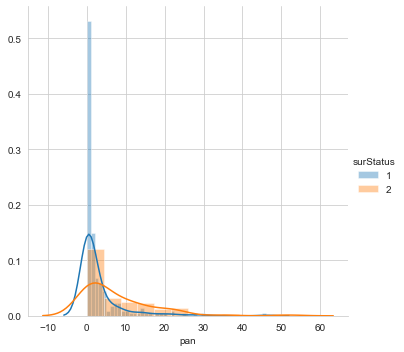

In [45]:
snb.FacetGrid(ds, hue="surStatus", height=5).map(snb.distplot, "pan").add_legend();
plt.show();

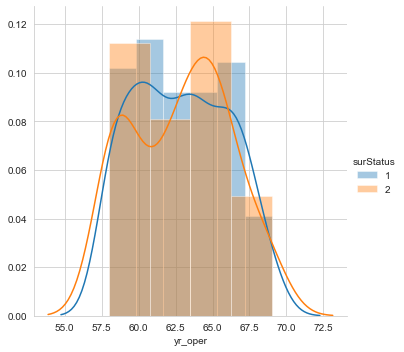

In [46]:
snb.FacetGrid(ds, hue="surStatus", height=5).map(snb.distplot, "yr_oper").add_legend();
plt.show();

From the above three distribution plots we can say that 
1. The first feature 'age' cannot much classify the classes of survived patients and non survived patients we can see that much of the patient who survived and not survived are both almost in same range(30-50 age)<br>
2. The second feature '64' i.e 'year of opeation' cannot much classify the survived patients and non survived patients we can see that most of the patients who survived and not survived are both almost in same range(1958 to 1966)
3. The third feature '1' i.e 'Number of positive axillary nodes' for survived class the most patients are in the range of 0-2 and where as for non survived class most of the patients are in the range of 0-5 although both the groups are overlapped we can say the survived group are more dominated in 0-1 range compared to non survived class.

In [ ]:

counts,bin_edges=np.histogram(sur['30'],bins=30,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


more than 80%  of the survived patients have age less than 64

In [ ]:
counts,bin_edges=np.histogram(n_sur['30'],bins=30,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


more than 80% of the non survived patients have age less than 63

In [ ]:
counts,bin_edges=np.histogram(sur['64'],bins=30,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


80% of the survived patients have taken the operation before 1966

In [ ]:
counts,bin_edges=np.histogram(n_sur['64'],bins=30,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


80% of the non survived patients have taken the operation before 1965

In [ ]:
counts,bin_edges=np.histogram(sur['1'],bins=30,density=True)
pdf=counts*(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [ ]:
counts,bin_edges=np.histogram(sur['64'],bins=30,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(n_sur['64'],bins=30,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [ ]:
counts,bin_edges=np.histogram(sur['1'],bins=20,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,)
plt.plot(bin_edges[1:],cdf,)

counts,bin_edges=np.histogram(n_sur['1'],bins=20,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'r+')
plt.plot(bin_edges[1:],cdf,'r+')

The above three plots doesnot much helps in classification of the patients because the plots are overlapped 

From above plot we cannot much classify the patients of '1' class and '2' class

In [ ]:
counts*(sum(counts))

bin_edges

In [ ]:
plt.hist(sur['30'],bins=20)

In [ ]:
mm=np.amax(sur['30'])
mn=np.amin(sur['30'])

print((mm-mn)/20)

In [ ]:
print('means')
print('survived mean age',np.mean(sur['Age']))
print('not survived mean age' ,np.mean(n_sur['Age']))
print('survived mean year of operation',np.mean(sur['year of operation']))
print('not survived mean year of operation',np.mean(n_sur['year of operation']))

In [ ]:
print('standard deviation')
print('standard deviation of survived age:',np.std(sur['Age']))
print('standard deviation of not_survived age:',np.std(n_sur['Age']))
